# 로지스틱회귀
- 공부한시간 데이터를 보고 합격여부를 예측
- 공부시간에 비례해서 점수를 부여
- 공부 1시간에 10점 부여
-> 선형 방정식 <br>
- 합격점수`(z)=w*(공부시간)+b`
    - `w`(가중치): 중요도 - 1시간당 점수 10점
    - `b`(편향): 기본점수(-50, 5시간은 공부해야 0점)
문제점: 합격점수에 해당하는 100점이 나올 수도 있지만, <br>
- 200점이 나올 수도 있음. 분류를 하기 위해 합격/불합격 판단을 해야하는데, 우리가 원하는 건은 _방정식의 값으로 **'확률'** 을 계산_
- 점수를 확률로 바꿔야한다. (`시그모이드 함수`): 0 ~ 1사이의 값
```
합격확률 = 시그모이드(z) = 1/1 + e^-z
```
합격점수가 높으면 1에 가깝고, 낮으면 0에 가깝다. <br>
합격점수가 0이면 정확히 0.5(50%) - 임계값

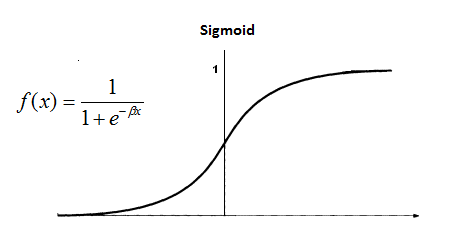

---

## 비용함수(=손실함수) loss function
- 모델이 얼마나 틀렸는지 측정
- 로지스틱은 로그함수 사용

<br>

< log_loss의 원리 >

- 합격(정답=1)
    - 모델이 99% 합격예측 ==> 벌점은 거의 0점
    - 모델이 1% 합격예측 --> 벌점은 크게(무한대에 가깝게)

- 불합격(정답=0)
    - 모델이 1%로 합격예측 -> 잘 맞춤. 벌점은 거의 0점
    - 모델이 99%로 합격예측 -> 완전 틀림. 벌점을 아주크게 <br>

`w,b를 찾음 -> 손실함수를 이용해서 비용이 가장 낮을 때`

> 비용이 최저인 값을 찾아나가는 과정: 경사하강법

---

## 규제
- 학습에 대해 너무 완벽한 모델 에 대해 규제 (과적합 방지)

**L2규제(Ridge)**: `w`(중요도)값이 너무 커지는 것을 막음. 가중치(계수)들이 너무 커지지 않도록 제어하는 규제 => 계수 작게 만들기. (과적합 방지)

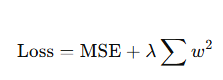

**L1규제(Lasso)**: 불필요한 특성의 가중치를 0으로 만들어 변수 선택 효과를 내는 규제 => 필요없는 변수 없얘기. (과적합 방지&변수 선택)

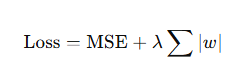


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

clr = LogisticRegression(max_iter=10000)  #() -> ConvergenceWarning
clr.fit(X_train,y_train)
y_pred = clr.predict(X_test)

print(y_pred[:5], y_test[:5])

# [0일 확률, 1일 확률] - 1개의 샘플
predict_proba = clr.predict_proba(X_test)
predict_proba[:5]

[0 1 1 0 1] [0 1 1 0 0]


array([[8.70169792e-01, 1.29830208e-01],
       [6.71941427e-03, 9.93280586e-01],
       [1.32021059e-04, 9.99867979e-01],
       [9.85288770e-01, 1.47112303e-02],
       [3.52487175e-01, 6.47512825e-01]])

In [11]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# --- 시각화 함수 (공통) ---
def plot_decision_boundary(model, X_orig, y_orig, poly_transformer, scaler_transformer, title, subplot_ax):
    """모델의 결정 경계를 그려주는 함수"""
    # 1. 그래프를 그릴 영역을 정의합니다.
    x_min, x_max = X_orig[:, 0].min() - 0.5, X_orig[:, 0].max() + 0.5
    y_min, y_max = X_orig[:, 1].min() - 0.5, X_orig[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 2. 그래프 영역의 모든 점들을 모델이 예측할 수 있도록 변환합니다.
    grid_poly = poly_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    grid_scaled = scaler_transformer.transform(grid_poly)

    # 3. 변환된 점들을 모델로 예측합니다.
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    # 4. 결정 경계와 원본 데이터 포인트를 그립니다.
    subplot_ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    subplot_ax.scatter(X_orig[:, 0], X_orig[:, 1], c=y_orig, cmap=plt.cm.coolwarm, edgecolors='k')
    subplot_ax.set_title(title)
    subplot_ax.set_xlabel("Feature 1")
    subplot_ax.set_ylabel("Feature 2")

In [ ]:
# 과적합을 임의로 만들어 시각화
# 1. 규제 알고리즘을 적용
# 2. 모델을 경량화 -> 모델의 복잡도를 높이는 요소를 제거
# 3. 추가 데이터를 투입해 학습

In [21]:
# 과적합 모델
X_small,y_small = make_moons(n_samples=50, noise=0.25, random_state=45)
# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_small = poly.fit_transform(X_small)
# 스케일링
scaler = StandardScaler()
X_small_scaled = scaler.fit_transform(X_poly_small)
# 모델 훈련(데이터 50개, 약한 규제)
log_reg_overfit = LogisticRegression(C=1000, max_iter=10000) # C 규제강도 -> 클수록 규제를 약하게 함.
log_reg_overfit.fit(X_small_scaled, y_small)


# 규제 적용(데이터 50개, 강한 규제)
log_reg_regulation = LogisticRegression(C=0.1,max_iter=1000, random_state=45)
log_reg_regulation.fit(X_small_scaled,y_small)


# 데이터 추가 (500개 추가, 규제 약하게)
X_large, y_large = make_moons(n_samples=500, noise=0.25, random_state=45)
# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_large = poly.fit_transform(X_large)
# 스케일링
scaler = StandardScaler()
X_large_scaled = scaler.fit_transform(X_poly_large)
# 모델 훈련
log_reg_moredata = LogisticRegression(C=1000, max_iter=10000) # C 규제강도 -> 클수록 규제를 약하게 함.
log_reg_moredata.fit(X_large_scaled, y_large)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1000
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


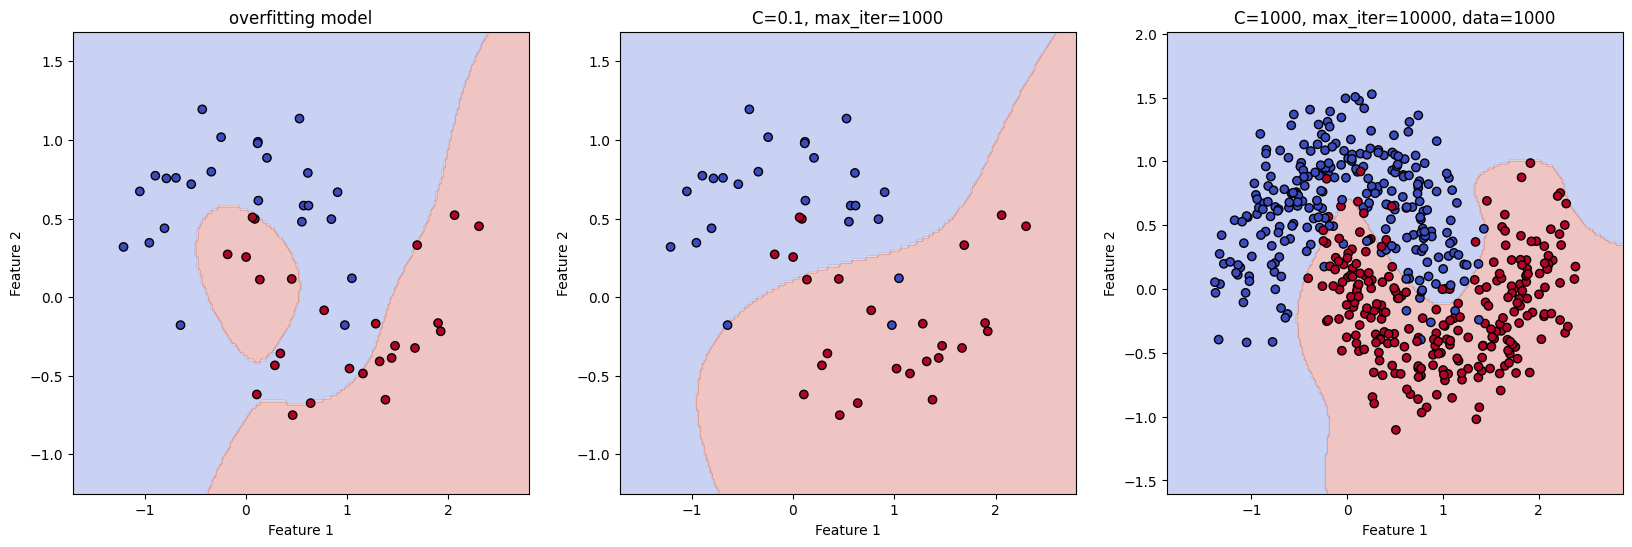

In [22]:
fig,axes = plt.subplots(1,3, figsize=(20,6))
plot_decision_boundary(log_reg_overfit, X_small, y_small, poly, scaler, 'overfitting model', axes[0])
plot_decision_boundary(log_reg_regulation, X_small, y_small, poly, scaler, 'C=0.1, max_iter=1000', axes[1])
plot_decision_boundary(log_reg_moredata, X_large, y_large, poly, scaler, 'C=1000, max_iter=10000, data=1000', axes[2])

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# 공통 파이프라인 구조 정의
def make_pipeline_model(C=1.0, degree=10, max_iter=10000, random_state=None):
    pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, max_iter=max_iter, random_state=random_state))
    ])
    return pipe


# (1) 과적합 모델: 데이터 50개 + 약한 규제
X_small, y_small = make_moons(n_samples=50, noise=0.25, random_state=45)
log_reg_overfit = make_pipeline_model(C=1000, degree=10)
log_reg_overfit.fit(X_small, y_small)

# (2) 강한 규제 적용: 데이터 50개 + 강한 규제
log_reg_regulation = make_pipeline_model(C=0.1, degree=10, random_state=45)
log_reg_regulation.fit(X_small, y_small)

# (3) 데이터 증가: 데이터 500개 + 약한 규제
X_large, y_large = make_moons(n_samples=500, noise=0.25, random_state=45)
log_reg_moredata = make_pipeline_model(C=1000, degree=10)
log_reg_moredata.fit(X_large, y_large)

# 결과 확인
print(f"과적합 모델 계수 shape: {log_reg_overfit.named_steps['log_reg'].coef_.shape}")
print(f"강한 규제 모델 계수 shape: {log_reg_regulation.named_steps['log_reg'].coef_.shape}")
print(f"데이터 많은 모델 계수 shape: {log_reg_moredata.named_steps['log_reg'].coef_.shape}")


# ROC, AUC
- 정확도 99% -> 하지만, 데이터 불균형이라면 좋은 척도가 되지 못한다.
- ROC, AUC: 얼마나 안정적으로 좋은 성능을 내는지 종합적으로 시각화
- 모델이 예측한 확률을 기반으로 분류기준점(Threshold)를 계속 변경해서, 모델의 성능이 어떻게 변화하는지 하나의 곡선으로 

## ROC 곡선 (Receiver Operating Characteristic Curve)
### ROC의 구성요소 (TPR, FPR)
- 혼동행렬: <br>
        (p:1, n:0) p:암환자, n:정상
    - TP: 암환자, 예측 암환자 (정답)
    - FN: 암환자, 예측 정상   <오답>놓친 암환자
    - FP: 정상, 예측 암환자 <오답>잘못된 예측
    - TN: 정상, 예측 정상 (정상)

ROC 곡선의 x와 y축 담당 <br>
- y축: 실제 양성 중, 모델이 양성으로 맞춘 비율 TPR(True Positive Rate)
    - TPR: 민감도 or 재현율  TP/TP+FN
- x축: 실제 음성 중, 모델이 양성으로 잘못 예측한 비율 FPR(False Positive Rate)
    - FPR: FP / (FP + TN)

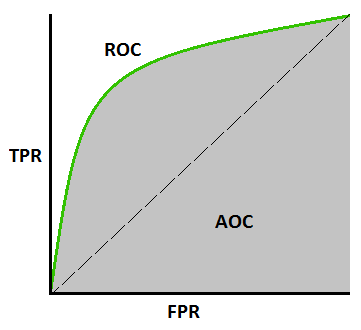

# AUC (Area Under the Curve)
- ROC곡선 아래 면적
- 모델이 양성과 음성을 얼마나 잘 구분하는지를 0~1 사이의 수치로 표현한 값
    - 1: 완벽한 모델, ROC가 좌측상단에 붙어있는 모양
    - 0.5: 무작위로 찍는 것과 같음 . 랜덤하게 예측 ROC대각선 직선
    - <0.5: 예측을 반대로 -> 잘못된 모델

c:\python_src\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


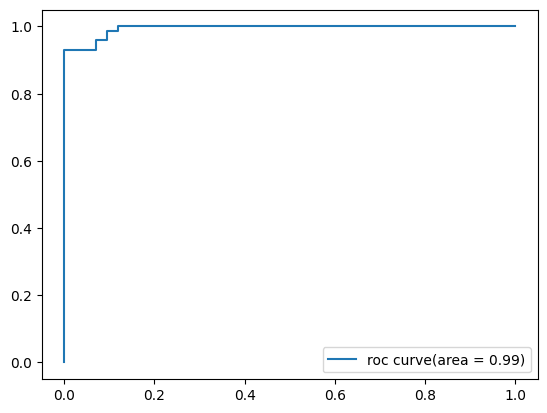

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [27]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, classification_report

make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=0, random_state=42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_proba = model.predict_proba(X_test)[:,1] # 양성클래스의 확률

# ROC AUC
# 실제값과 예측 확률 사용 FPR, TPR
fpr, tpr, thresholds =  roc_curve(y_test, y_pred_proba)
# fpr tpr 이용 auc를 계산
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,label = f'roc curve(area = {roc_auc:.2f})')
plt.legend()
plt.show()

print(classification_report(y_test, model.predict(X_test))  )